In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.datasets import make_blobs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
np.set_printoptions(precision = 2)
from lab_utils_multiclass_TF import *
tf.autograph.set_verbosity(0)

In [ ]:
classes = 4
m = 100
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
std = 1.0
X_train, y_train = make_blobs(n_samples=m, centers=centers, cluster_std=std,random_state=30)

/content/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


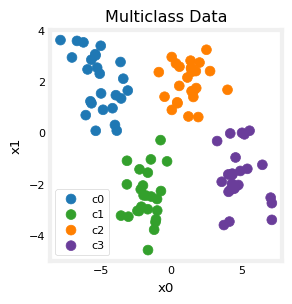

In [ ]:
plt_mc(X_train,y_train,classes, centers, std=std)

In [ ]:
tf.random.set_seed(1234)

model = Sequential(
    [
        Dense(2,activation = 'relu', name = 'L1'),
        Dense(4, activation = 'linear', name = 'L2')
    ]
)

In [ ]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(0.01)
)

model.fit(
    X_train,y_train,
    epochs = 200
)

Epoch 1/200
4/4 [==============================] - 1s 6ms/step - loss: 1.2638
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 1.1868
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 1.1200
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 1.0710
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 1.0223
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 0.9849
Epoch 7/200
4/4 [==============================] - 0s 4ms/step - loss: 0.9495
Epoch 8/200
4/4 [==============================] - 0s 3ms/step - loss: 0.9148
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 0.8838
Epoch 10/200
4/4 [==============================] - 0s 3ms/step - loss: 0.8549
Epoch 11/200
4/4 [==============================] - 0s 3ms/step - loss: 0.8282
Epoch 12/200
4/4 [==============================] - 0s 3ms/step - loss: 0.8030
Epoch 13/200
4/4 [==============================] - 0s 3ms/st

 41/184 [=====>........................] - ETA: 0s 

/content/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


184/184 [==============================] - 0s 1ms/step


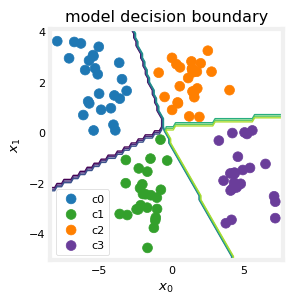

In [ ]:
plt_cat_mc(X_train, y_train, model, classes)


In [ ]:
W1,b1 = model.get_layer('L1').get_weights()
print(W1,b1)

[[ 0.65  1.38]
 [-2.06  0.77]] [1.45 1.49]


/content/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/content/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


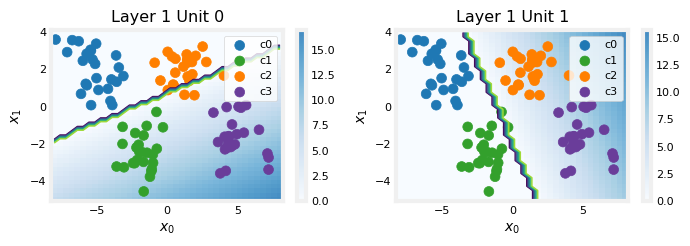

In [ ]:
plt_layer_relu(X_train, y_train.reshape(-1,), W1, b1, classes)


/content/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/content/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/content/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/content/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


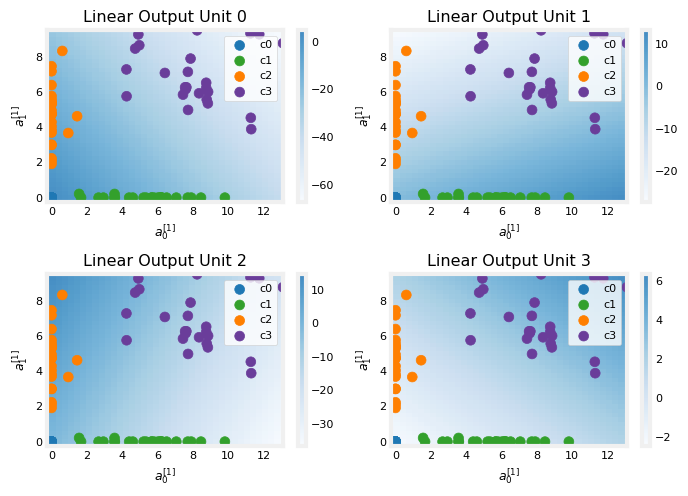

In [ ]:
l2 = model.get_layer("L2")
W2, b2 = l2.get_weights()
# create the 'new features', the training examples after L1 transformation
Xl2 = np.maximum(0, np.dot(X_train,W1) + b1)

plt_output_layer_linear(Xl2, y_train.reshape(-1,), W2, b2, classes,
                        x0_rng = (-0.25,np.amax(Xl2[:,0])), x1_rng = (-0.25,np.amax(Xl2[:,1])))